In [20]:
import pandas as pd

# Load the movies.csv file
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")

# Get the shape
print("Shape of movies.csv:", movies_df.shape)

Shape of movies.csv: (9742, 3)


In [21]:
import pandas as pd

# Load the ratings.csv file
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")

# Find the number of unique userId values
unique_user_ids = ratings_df['userId'].nunique()

print("Number of unique userId:", unique_user_ids)

Number of unique userId: 610


In [22]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")

# Count the number of ratings per movie
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# Merge with movies_df to get the movie titles
merged_df = pd.merge(ratings_count, movies_df, on='movieId')

# Find the movie with the maximum ratings
max_rated_movie = merged_df.loc[merged_df['count'].idxmax()]

print("Movie with the maximum ratings:")
print(max_rated_movie[['title', 'count']])

Movie with the maximum ratings:
title    Forrest Gump (1994)
count                    329
Name: 314, dtype: object


In [23]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
tags_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\tags.csv")

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for the movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

# Display the tags
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags)

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [24]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for the movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


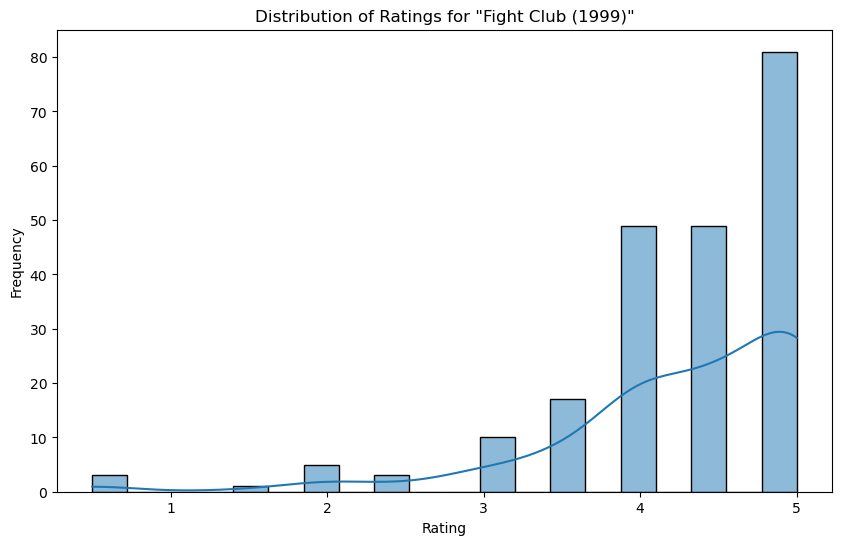

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for the movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, kde=True, bins=20)
plt.title('Distribution of Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [26]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")

# Group ratings by movieId and calculate count and mean
ratings_grouped = ratings_df.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

# Merge with movies_df to get movie titles
merged_df = pd.merge(ratings_grouped, movies_df, on='movieId')

# Filter movies with more than 50 ratings
filtered_df = merged_df[merged_df['count'] > 50]

# Find the movie with the highest average rating
most_popular_movie = filtered_df.loc[filtered_df['mean_rating'].idxmax()]

print("Most popular movie based on average user ratings:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean_rating']:.2f}")

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43


In [27]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")


# Group ratings by movieId and calculate count and mean
ratings_grouped = ratings_df.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

# Merge with movies_df to get movie titles
merged_df = pd.merge(ratings_grouped, movies_df, on='movieId')

# Filter movies with more than 50 ratings
filtered_df = merged_df[merged_df['count'] > 50]

# Find the top 5 movies based on the number of ratings
top_5_movies = filtered_df.nlargest(5, 'count')

# List of movies to check
movies_to_check = [
    'Pulp Fiction (1994)',
    'Bad Boys (1995)',
    'Silence of the Lambs, The (1991)',
    'Matrix, The (1999)'
]

# Check which of the given movies are in the top 5
top_5_movie_titles = top_5_movies['title'].tolist()
correct_options = [movie for movie in movies_to_check if movie in top_5_movie_titles]

print("Movies in the top 5 based on number of user ratings:")
print(correct_options)

Movies in the top 5 based on number of user ratings:
['Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [28]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\movies.csv")
ratings_df = pd.read_csv("C:\\Users\\sriga\\Downloads\\movie_data\\ratings.csv")

# Group ratings by movieId and calculate count
ratings_grouped = ratings_df.groupby('movieId').agg(
    count=('rating', 'size')
).reset_index()

# Merge with movies_df to get movie titles
merged_df = pd.merge(ratings_grouped, movies_df, on='movieId')

# Filter movies with more than 50 ratings
filtered_df = merged_df[merged_df['count'] > 50]

# List of Sci-Fi movies to check
sci_fi_movies = [
    'Deadpool (2016)',
    'Terminator 2: Judgment Day (1991)',
    'X-Men: The Last Stand (2006)',
    'Jurassic Park (1993)'
]

# Filter Sci-Fi movies from the dataset
sci_fi_movies_df = filtered_df[filtered_df['title'].isin(sci_fi_movies)]

# Sort by the number of ratings in descending order and get the third most popular
third_most_popular_sci_fi = sci_fi_movies_df.nlargest(3, 'count').iloc[2]

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"Title: {third_most_popular_sci_fi['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi['count']}")

Third most popular Sci-Fi movie based on number of user ratings:
Title: Deadpool (2016)
Number of Ratings: 54
